In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
file_path = '/content/E-commerce_data.xlsx'

In [7]:
customers = pd.read_excel(file_path, sheet_name="customers")
genders = pd.read_excel(file_path, sheet_name="genders")
cities = pd.read_excel(file_path, sheet_name="cities")
transactions = pd.read_excel(file_path, sheet_name="transactions")
branches = pd.read_excel(file_path, sheet_name="branches")
merchants = pd.read_excel(file_path, sheet_name="merchants")

In [8]:
customers_full = customers.merge(genders, on="gender_id", how="left") \
                          .merge(cities, on="city_id", how="left")
customers_full.head()

,customer_id,join_date,city_id,gender_id,gender_name,city_name
0,1,2022-01-08,7,1,Male,Mansoura
1,2,2023-05-02,20,2,Female,Sohag
2,3,2023-05-14,15,1,Male,Aswan
3,4,2022-11-25,11,2,Female,Ismailia
4,5,2023-04-26,8,1,Male,El-Mahalla El-Kubra


In [9]:
transactions_full = transactions.merge(customers_full, on="customer_id", how="left") \
                                 .merge(branches, on="branch_id", how="left") \
                                 .merge(merchants, on="merchant_id", how="left")
transactions_full.head()

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,gender_name,city_name,merchant_id,merchant_name
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2023-05-16,15,2,Female,Aswan,7,Berry-Anderson
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,2022-10-10,14,2,Female,Damietta,9,"Campbell, Shaffer and Martinez"
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7,2022-05-30,2,1,Male,Alexandria,7,Berry-Anderson
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2,2023-11-27,15,2,Female,Aswan,18,Lewis LLC
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,2021-09-04,14,1,Male,Damietta,15,Butler-Gomez


In [12]:
print("Columns in branches:", branches.columns)

Columns in branches: Index(['branch_id', 'merchant_id'], dtype='object')


In [13]:
print("Columns in transactions_full:", transactions_full.columns)

Columns in transactions_full: Index(['transaction_id', 'customer_id', 'transaction_date',
       'transaction_status', 'coupon_name', 'burn_date', 'branch_id',
       'join_date', 'city_id', 'gender_id', 'gender_name', 'city_name',
       'merchant_id', 'merchant_name'],
      dtype='object')


In [15]:
transactions_full = transactions_full.drop(columns=['merchant_id'], errors='ignore') \
                                     .merge(branches, on="branch_id", how="left") \
                                     .merge(merchants, on="merchant_id", how="left")
transactions_full.head()

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,gender_name,city_name,merchant_name_x,merchant_name_y,merchant_id,merchant_name
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2023-05-16,15,2,Female,Aswan,Berry-Anderson,Berry-Anderson,7,Berry-Anderson
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,2022-10-10,14,2,Female,Damietta,"Campbell, Shaffer and Martinez","Campbell, Shaffer and Martinez",9,"Campbell, Shaffer and Martinez"
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7,2022-05-30,2,1,Male,Alexandria,Berry-Anderson,Berry-Anderson,7,Berry-Anderson
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2,2023-11-27,15,2,Female,Aswan,Lewis LLC,Lewis LLC,18,Lewis LLC
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,2021-09-04,14,1,Male,Damietta,Butler-Gomez,Butler-Gomez,15,Butler-Gomez


In [16]:
customer_aggregated = transactions_full.groupby('customer_id').agg({
    'transaction_id': 'count',
    'transaction_date': ['min', 'max'],
    'branch_id': 'nunique',
    'merchant_id': 'nunique'
}).reset_index()

In [17]:
customer_aggregated.columns = ['customer_id', 'transaction_count', 'first_transaction', 'last_transaction', 'branch_count', 'merchant_count']
customer_aggregated.head()

,customer_id,transaction_count,first_transaction,last_transaction,branch_count,merchant_count
0,1,7,2022-02-14,2024-05-26,6,5
1,2,3,2023-05-21,2023-10-21,3,3
2,3,5,2023-06-08,2024-07-05,4,4
3,4,1,2023-01-15,2023-01-15,1,1
4,5,4,2023-05-03,2024-07-02,4,3


In [18]:
customer_aggregated = customer_aggregated.merge(customers_full, on='customer_id', how='left')
customer_aggregated.head()

,customer_id,transaction_count,first_transaction,last_transaction,branch_count,merchant_count,join_date,city_id,gender_id,gender_name,city_name
0,1,7,2022-02-14,2024-05-26,6,5,2022-01-08,7,1,Male,Mansoura
1,2,3,2023-05-21,2023-10-21,3,3,2023-05-02,20,2,Female,Sohag
2,3,5,2023-06-08,2024-07-05,4,4,2023-05-14,15,1,Male,Aswan
3,4,1,2023-01-15,2023-01-15,1,1,2022-11-25,11,2,Female,Ismailia
4,5,4,2023-05-03,2024-07-02,4,3,2023-04-26,8,1,Male,El-Mahalla El-Kubra


In [19]:
features = customer_aggregated[['transaction_count', 'branch_count', 'merchant_count']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [20]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
df_feat = pd.DataFrame(scaled_features,columns=features.columns)
df_feat.head()

,transaction_count,branch_count,merchant_count
0,0.855575,1.306961,0.971414
1,-0.904516,-0.650512,-0.495347
2,-0.024470,0.001979,0.238034
3,-1.784562,-1.955493,-1.962108
4,-0.464493,0.001979,-0.495347


In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_aggregated['cluster'] = kmeans.fit_predict(scaled_features)
customer_aggregated.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,customer_id,transaction_count,first_transaction,last_transaction,branch_count,merchant_count,join_date,city_id,gender_id,gender_name,city_name,cluster
0,1,7,2022-02-14,2024-05-26,6,5,2022-01-08,7,1,Male,Mansoura,0
1,2,3,2023-05-21,2023-10-21,3,3,2023-05-02,20,2,Female,Sohag,1
2,3,5,2023-06-08,2024-07-05,4,4,2023-05-14,15,1,Male,Aswan,2
3,4,1,2023-01-15,2023-01-15,1,1,2022-11-25,11,2,Female,Ismailia,1
4,5,4,2023-05-03,2024-07-02,4,3,2023-04-26,8,1,Male,El-Mahalla El-Kubra,2


In [49]:
display(customer_aggregated[['customer_id', 'transaction_count', 'branch_count', 'merchant_count', 'cluster']])
print(customer_aggregated.columns)

,customer_id,transaction_count,branch_count,merchant_count,cluster
0,1,7,6,5,0
1,2,3,3,3,1
2,3,5,4,4,2
3,4,1,1,1,1
4,5,4,4,3,2
...,...,...,...,...,...
984,996,3,3,3,1
985,997,3,3,3,1
986,998,4,4,3,2
987,999,4,4,4,2


Index(['customer_id', 'transaction_count', 'first_transaction',
       'last_transaction', 'branch_count', 'merchant_count', 'join_date',
       'city_id', 'gender_id', 'gender_name', 'city_name', 'cluster',
       'dbscan_cluster', 'hierarchical_cluster'],
      dtype='object')


In [50]:
gender_distribution = customer_aggregated['gender_name'].value_counts()
print("\nGender Distribution:")
print(gender_distribution)


Gender Distribution:
gender_name
Male      504
Female    485
Name: count, dtype: int64


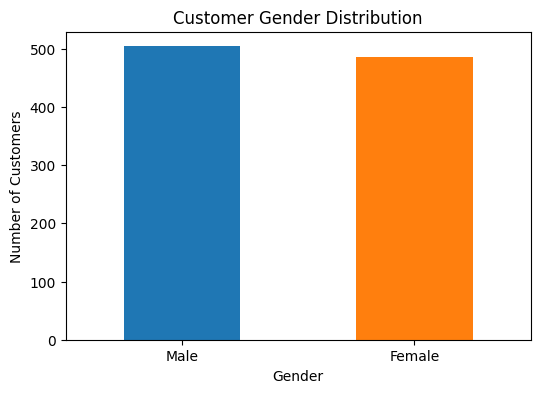

In [51]:
plt.figure(figsize=(6,4))
gender_distribution.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

In [52]:
city_distribution = customer_aggregated['city_name'].value_counts()
print("\nCity Distribution:")
print(city_distribution)


City Distribution:
city_name
Cairo                  66
Port Said              64
Giza                   58
Aswan                  57
El-Mahalla El-Kubra    57
Damanhur               55
Qena                   54
Shubra El-Kheima       50
Fayyum                 50
Zagazig                49
Suez                   48
Sohag                  47
Alexandria             47
Tanta                  45
Minya                  44
Mansoura               43
Asyut                  42
Damietta               41
Ismailia               39
Beni Suef              33
Name: count, dtype: int64


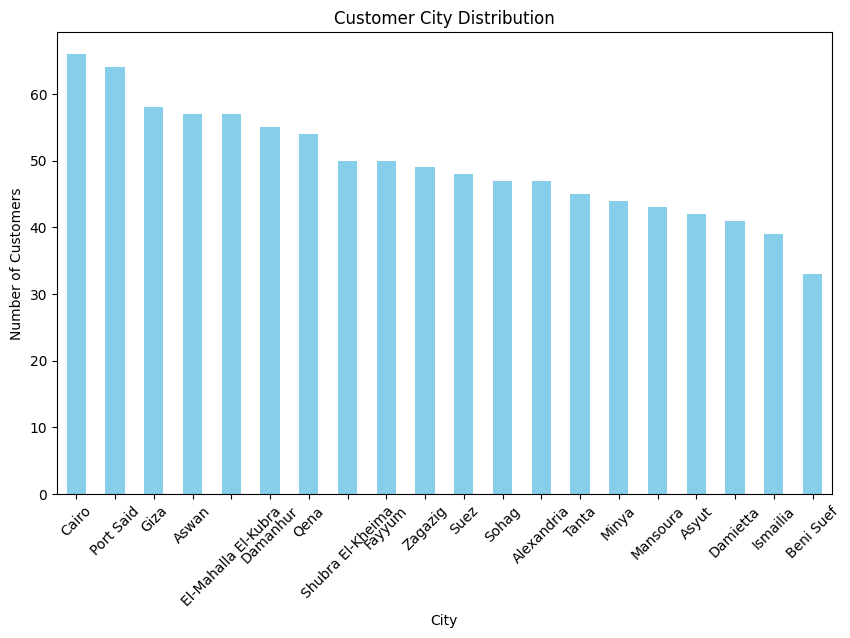

In [53]:
plt.figure(figsize=(10,6))
city_distribution.plot(kind='bar', color='skyblue')
plt.title('Customer City Distribution')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [54]:
branch_distribution = transactions_full['branch_id'].value_counts()
print("\nBranch Usage Distribution:")
print(branch_distribution)


Branch Usage Distribution:
branch_id
1     527
10    526
6     507
9     506
7     496
8     496
4     494
5     489
3     487
2     472
Name: count, dtype: int64


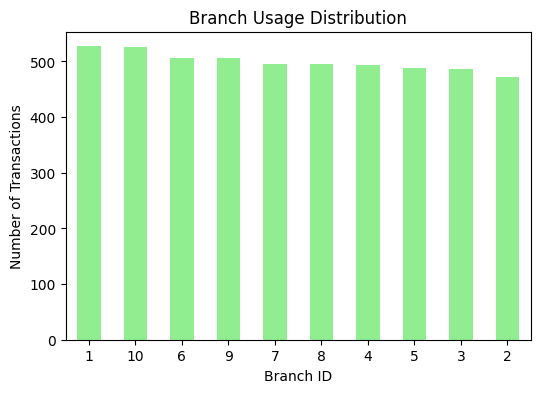

In [55]:
plt.figure(figsize=(6,4))
branch_distribution.plot(kind='bar', color='lightgreen')
plt.title('Branch Usage Distribution')
plt.xlabel('Branch ID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()

In [56]:
merchant_distribution = transactions_full['merchant_id'].value_counts()
print("\nMerchant Usage Distribution:")
print(merchant_distribution)


Merchant Usage Distribution:
merchant_id
13    1032
15    1001
11     527
7      496
20     496
9      489
8      487
18     472
Name: count, dtype: int64


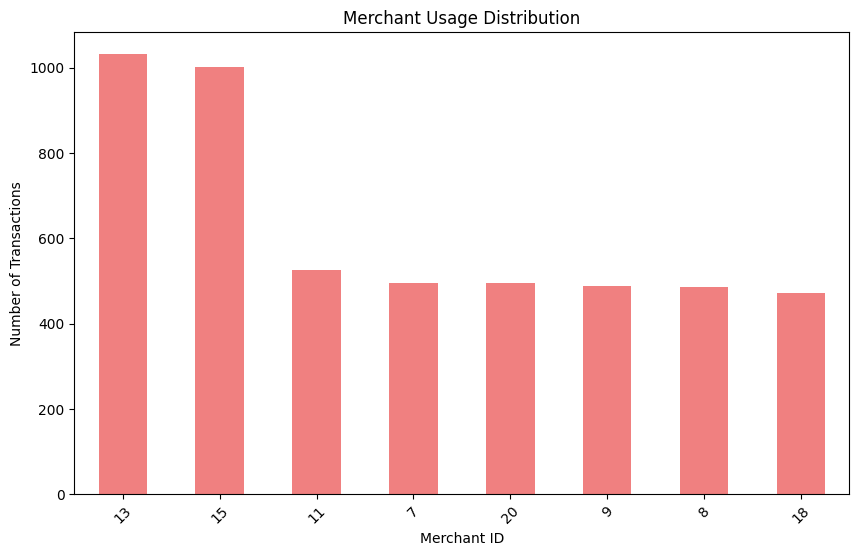

In [57]:
plt.figure(figsize=(10,6))
merchant_distribution.plot(kind='bar', color='lightcoral')
plt.title('Merchant Usage Distribution')
plt.xlabel('Merchant ID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

In [58]:
transactions_over_time = transactions_full.groupby(transactions_full['transaction_date'].dt.to_period('M')).size()
print("\nTransactions Over Time:")
print(transactions_over_time)


Transactions Over Time:
transaction_date
2021-08      3
2021-09      9
2021-10     10
2021-11     18
2021-12     17
2022-01     22
2022-02     26
2022-03     27
2022-04     39
2022-05     50
2022-06     48
2022-07     56
2022-08     57
2022-09     78
2022-10     79
2022-11     81
2022-12     72
2023-01    104
2023-02    115
2023-03    106
2023-04    105
2023-05    128
2023-06    151
2023-07    148
2023-08    161
2023-09    159
2023-10    204
2023-11    201
2023-12    209
2024-01    256
2024-02    249
2024-03    320
2024-04    345
2024-05    417
2024-06    540
2024-07    390
Freq: M, dtype: int64


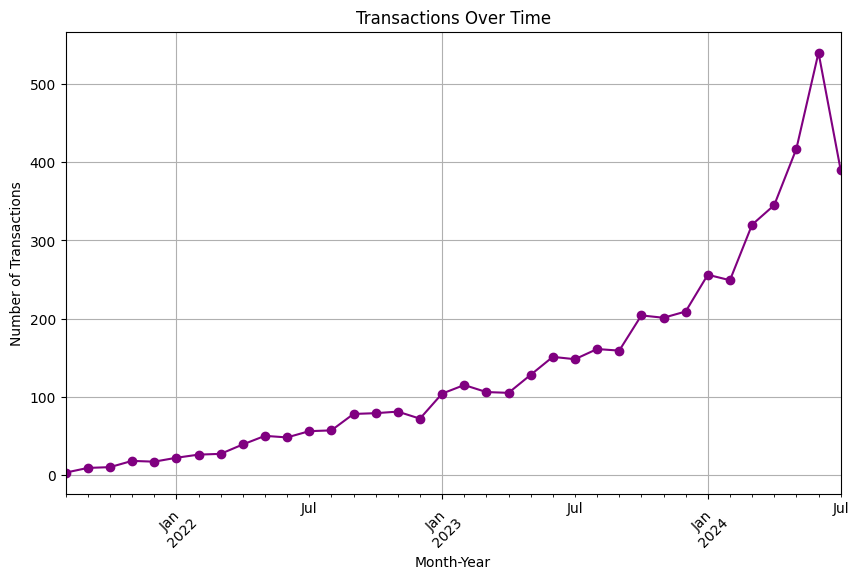

In [59]:
plt.figure(figsize=(10,6))
transactions_over_time.plot(kind='line', marker='o', color='purple')
plt.title('Transactions Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [60]:
from sklearn.cluster import DBSCAN

In [61]:
features = customer_aggregated[['transaction_count', 'branch_count', 'merchant_count']]

In [62]:
scaled_features = scaler.fit_transform(features)

In [63]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
customer_aggregated['dbscan_cluster'] = dbscan.fit_predict(scaled_features)

In [65]:
display(customer_aggregated[['customer_id', 'transaction_count', 'branch_count', 'merchant_count', 'dbscan_cluster']])
print(customer_aggregated.columns)

,customer_id,transaction_count,branch_count,merchant_count,dbscan_cluster
0,1,7,6,5,0
1,2,3,3,3,1
2,3,5,4,4,2
3,4,1,1,1,3
4,5,4,4,3,4
...,...,...,...,...,...
984,996,3,3,3,1
985,997,3,3,3,1
986,998,4,4,3,4
987,999,4,4,4,2


Index(['customer_id', 'transaction_count', 'first_transaction',
       'last_transaction', 'branch_count', 'merchant_count', 'join_date',
       'city_id', 'gender_id', 'gender_name', 'city_name', 'cluster',
       'dbscan_cluster', 'hierarchical_cluster'],
      dtype='object')


In [66]:
from sklearn.cluster import AgglomerativeClustering

In [67]:
hierarchical = AgglomerativeClustering(n_clusters=3)
customer_aggregated['hierarchical_cluster'] = hierarchical.fit_predict(scaled_features)

In [68]:
display(customer_aggregated[['customer_id', 'transaction_count', 'branch_count', 'merchant_count', 'hierarchical_cluster']])

,customer_id,transaction_count,branch_count,merchant_count,hierarchical_cluster
0,1,7,6,5,2
1,2,3,3,3,0
2,3,5,4,4,0
3,4,1,1,1,1
4,5,4,4,3,0
...,...,...,...,...,...
984,996,3,3,3,0
985,997,3,3,3,0
986,998,4,4,3,0
987,999,4,4,4,0


In [69]:
cluster_profile = customer_aggregated.groupby('dbscan_cluster').agg(
    avg_transactions=('transaction_count', 'mean'),
    avg_branches=('branch_count', 'mean'),
    avg_merchants=('merchant_count', 'mean'),
    total_customers=('customer_id', 'count')
).reset_index()

cluster_profile.to_csv('cluster_profile.csv', index=False)
cluster_profile.head()
display(cluster_profile)

,dbscan_cluster,avg_transactions,avg_branches,avg_merchants,total_customers
0,-1,8.764706,6.411765,5.058824,17
1,0,7.790323,6.000000,5.000000,62
2,1,3.849057,3.000000,3.000000,159
3,2,5.026738,4.000000,4.000000,187
4,3,1.245283,1.000000,1.000000,53
5,4,5.159420,4.000000,3.000000,69
6,5,7.125000,6.000000,4.000000,8
7,6,2.355932,2.000000,2.000000,118
8,7,8.285714,7.000000,5.000000,7
9,8,6.341772,5.000000,4.000000,79


In [70]:
customer_distribution = customer_aggregated['dbscan_cluster'].value_counts(normalize=True) * 100


print("Customer Distribution by Cluster:")
display(customer_distribution)

Customer Distribution by Cluster:


,proportion
dbscan_cluster,
2,18.907988
1,16.076845
10,12.639029
6,11.931244
8,7.987867
4,6.976744
0,6.268959
3,5.358948
12,4.246714


In [72]:
transactions_full = transactions_full.merge(
    customer_aggregated[['customer_id', 'dbscan_cluster']],
    on='customer_id',
    how='left'
)


print(transactions_full.columns)


customer_transactions_analysis = transactions_full.groupby('dbscan_cluster').agg(
    total_transactions=('transaction_id', 'count'),

).reset_index()


display(customer_transactions_analysis)

Index(['transaction_id', 'customer_id', 'transaction_date',
       'transaction_status', 'coupon_name', 'burn_date', 'branch_id',
       'join_date', 'city_id', 'gender_id', 'gender_name', 'city_name',
       'merchant_name_x', 'merchant_name_y', 'merchant_id', 'merchant_name',
       'dbscan_cluster'],
      dtype='object')


,dbscan_cluster,total_transactions
0,-1,149
1,0,483
2,1,612
3,2,940
4,3,66
5,4,356
6,5,57
7,6,278
8,7,58
9,8,501


In [73]:
comparison = customer_aggregated.groupby('dbscan_cluster').agg(
    avg_transactions=('transaction_count', 'mean'),
    avg_branches=('branch_count', 'mean'),
    avg_merchants=('merchant_count', 'mean')
).reset_index()

comparison.to_csv('comparison.csv', index=False)
display(comparison)

,dbscan_cluster,avg_transactions,avg_branches,avg_merchants
0,-1,8.764706,6.411765,5.058824
1,0,7.790323,6.000000,5.000000
2,1,3.849057,3.000000,3.000000
3,2,5.026738,4.000000,4.000000
4,3,1.245283,1.000000,1.000000
5,4,5.159420,4.000000,3.000000
6,5,7.125000,6.000000,4.000000
7,6,2.355932,2.000000,2.000000
8,7,8.285714,7.000000,5.000000
9,8,6.341772,5.000000,4.000000


In [74]:
active_customers = customer_aggregated[customer_aggregated['transaction_count'] > 10]

active_customers.to_csv('active_customers.csv', index=False)
display(active_customers)

,customer_id,transaction_count,first_transaction,last_transaction,branch_count,merchant_count,join_date,city_id,gender_id,gender_name,city_name,cluster,dbscan_cluster,hierarchical_cluster
69,73,12,2023-01-14,2024-07-12,7,6,2022-11-04,9,2,Female,Tanta,0,9,2
150,154,11,2024-07-04,2024-07-11,8,6,2024-07-04,1,2,Female,Cairo,0,-1,2
152,156,11,2024-05-23,2024-07-12,7,6,2024-05-22,10,2,Female,Asyut,0,9,2
465,471,12,2023-08-28,2024-06-12,7,7,2023-07-26,19,1,Male,Qena,0,-1,2
488,494,11,2022-09-30,2024-05-30,7,6,2022-09-18,7,1,Male,Mansoura,0,9,2
566,573,11,2021-09-08,2024-07-01,7,5,2021-08-15,12,1,Male,Fayyum,0,-1,2
716,726,13,2024-07-08,2024-07-14,9,8,2024-07-08,17,1,Male,Damanhur,0,-1,2
766,776,12,2022-01-10,2024-05-03,7,6,2022-01-08,12,1,Male,Fayyum,0,9,2
773,783,11,2023-05-10,2024-04-03,8,7,2023-04-01,2,2,Female,Alexandria,0,-1,2
812,822,14,2024-06-14,2024-07-14,8,7,2024-06-14,20,2,Female,Sohag,0,-1,2


In [75]:
active_customers = customer_aggregated[customer_aggregated['transaction_count'] > 5]
inactive_customers = customer_aggregated[customer_aggregated['transaction_count'] <= 5]


print(f"Number of active customers: {len(active_customers)}")
print(f"Number of inactive customers: {len(inactive_customers)}")


active_stats = active_customers[['customer_id', 'transaction_count', 'merchant_count', 'branch_count']].describe()
inactive_stats = inactive_customers[['customer_id', 'transaction_count', 'merchant_count', 'branch_count']].describe()


print("Active Customer Statistics:")
display(active_stats)

print("Inactive Customer Statistics:")
display(inactive_stats)

Number of active customers: 386
Number of inactive customers: 603
Active Customer Statistics:


,customer_id,transaction_count,merchant_count,branch_count
count,386.000000,386.000000,386.000000,386.000000
mean,524.111399,7.349741,4.777202,5.331606
std,280.966006,1.457435,0.991967,1.066070
min,1.000000,6.000000,2.000000,3.000000
25%,288.250000,6.000000,4.000000,5.000000
50%,536.500000,7.000000,5.000000,5.000000
75%,760.750000,8.000000,5.000000,6.000000
max,992.000000,14.000000,8.000000,9.000000


Inactive Customer Statistics:


,customer_id,transaction_count,merchant_count,branch_count
count,603.000000,603.000000,603.000000,603.000000
mean,485.668325,3.587065,2.970149,3.142620
std,292.205395,1.261610,1.071732,1.121916
min,2.000000,1.000000,1.000000,1.000000
25%,231.500000,3.000000,2.000000,2.000000
50%,474.000000,4.000000,3.000000,3.000000
75%,742.500000,5.000000,4.000000,4.000000
max,1000.000000,5.000000,5.000000,5.000000


In [77]:
branch_transactions = transactions_full.groupby('branch_id').agg(
    total_transactions=('transaction_id', 'count'),
    total_customers=('customer_id', 'nunique')
).reset_index()


branch_transactions = branch_transactions.merge(branches, on='branch_id', how='left')


display(branch_transactions)

,branch_id,total_transactions,total_customers,merchant_id
0,1,527,406,11
1,2,472,386,18
2,3,487,384,8
3,4,494,387,15
4,5,489,382,9
5,6,507,403,15
6,7,496,406,7
7,8,496,391,20
8,9,506,402,13
9,10,526,406,13


In [78]:
merchant_transactions = transactions_full.groupby('merchant_id').agg(
    total_transactions=('transaction_id', 'count'),
    total_customers=('customer_id', 'nunique')
).reset_index()


merchant_transactions = merchant_transactions.merge(merchants, on='merchant_id', how='left')


display(merchant_transactions)

,merchant_id,total_transactions,total_customers,merchant_name
0,7,496,406,Berry-Anderson
1,8,487,384,Medina-Foster
2,9,489,382,"Campbell, Shaffer and Martinez"
3,11,527,406,"Smith, Lawson and Hernandez"
4,13,1032,650,Thomas-Nelson
5,15,1001,630,Butler-Gomez
6,18,472,386,Lewis LLC
7,20,496,391,Griffin-Leblanc


In [79]:
transactions_full['transaction_date'] = pd.to_datetime(transactions_full['transaction_date'])


transactions_full['year'] = transactions_full['transaction_date'].dt.year
transactions_full['month'] = transactions_full['transaction_date'].dt.month


time_analysis = transactions_full.groupby(['year', 'month']).agg(
    total_transactions=('transaction_id', 'count')
).reset_index()


display(time_analysis)

,year,month,total_transactions
0,2021,8,3
1,2021,9,9
2,2021,10,10
3,2021,11,18
4,2021,12,17
5,2022,1,22
6,2022,2,26
7,2022,3,27
8,2022,4,39
9,2022,5,50


In [80]:
coupon_usage = transactions_full.groupby('coupon_name').agg(
    total_uses=('transaction_id', 'count'),
    unique_customers=('customer_id', 'nunique')
).reset_index()


display(coupon_usage)

,coupon_name,total_uses,unique_customers
0,AAB-523,1,1
1,AAe-970,1,1
2,AAq-338,1,1
3,ACW-075,1,1
4,AEz-708,1,1
...,...,...,...
4995,zyO-636,1,1
4996,zyS-454,1,1
4997,zyg-519,1,1
4998,zzo-479,1,1


In [81]:
city_analysis = customer_aggregated.groupby('city_name').agg(
    total_customers=('customer_id', 'count')
).reset_index()


display(city_analysis)

,city_name,total_customers
0,Alexandria,47
1,Aswan,57
2,Asyut,42
3,Beni Suef,33
4,Cairo,66
5,Damanhur,55
6,Damietta,41
7,El-Mahalla El-Kubra,57
8,Fayyum,50
9,Giza,58


In [82]:
gender_analysis = transactions_full.groupby('gender_name').agg(
    total_transactions=('transaction_id', 'count'),
    total_customers=('customer_id', 'nunique')
).reset_index()


display(gender_analysis)

,gender_name,total_transactions,total_customers
0,Female,2433,485
1,Male,2567,504


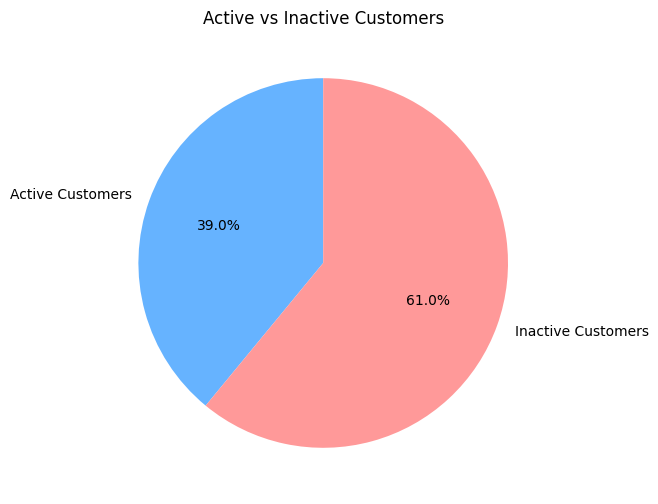

In [83]:
import matplotlib.pyplot as plt


active_count = len(active_customers)
inactive_count = len(inactive_customers)


labels = ['Active Customers', 'Inactive Customers']
sizes = [active_count, inactive_count]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Active vs Inactive Customers')
plt.show()

<ipython-input-84-6b6ea65d5018>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='branch_id', y='total_transactions', data=branch_transactions, palette="Blues_d")


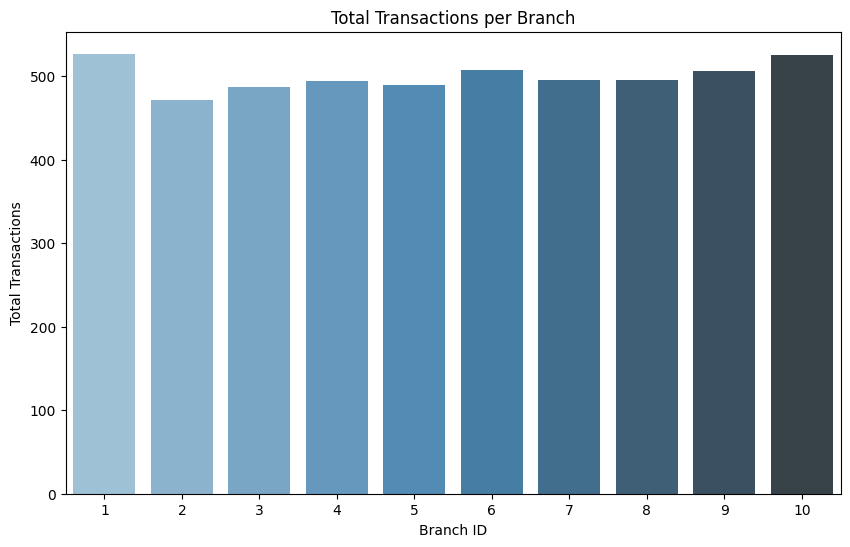

In [84]:
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.barplot(x='branch_id', y='total_transactions', data=branch_transactions, palette="Blues_d")
plt.title('Total Transactions per Branch')
plt.xlabel('Branch ID')
plt.ylabel('Total Transactions')
plt.show()

<ipython-input-85-a92d0e13eca0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='merchant_name', y='total_transactions', data=merchant_transactions, palette="Greens_d")


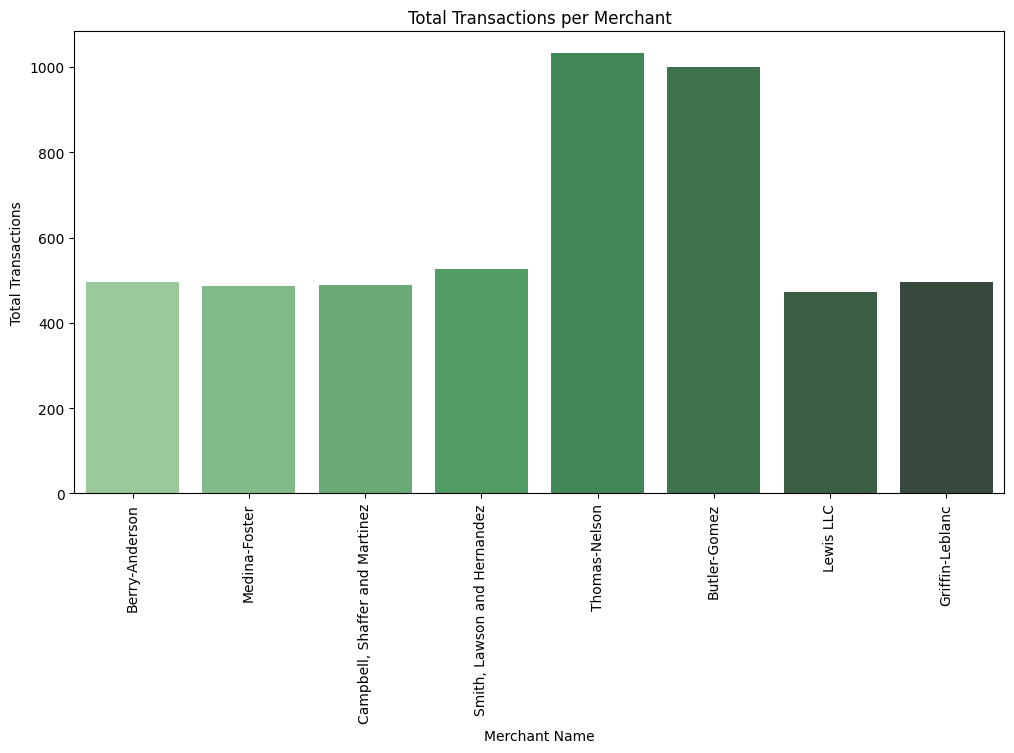

In [85]:
plt.figure(figsize=(12, 6))
sns.barplot(x='merchant_name', y='total_transactions', data=merchant_transactions, palette="Greens_d")
plt.title('Total Transactions per Merchant')
plt.xticks(rotation=90)
plt.xlabel('Merchant Name')
plt.ylabel('Total Transactions')
plt.show()

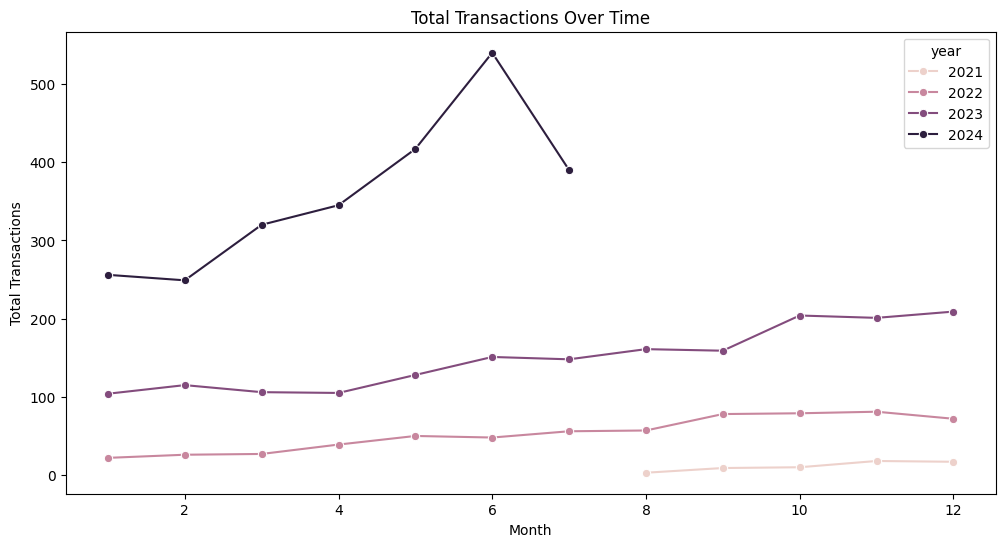

In [86]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='total_transactions', hue='year', data=time_analysis, marker='o')
plt.title('Total Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Total Transactions')
plt.show()

<ipython-input-88-8b686e885f67>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city_name', y='total_customers', data=city_analysis, palette="Oranges_d")


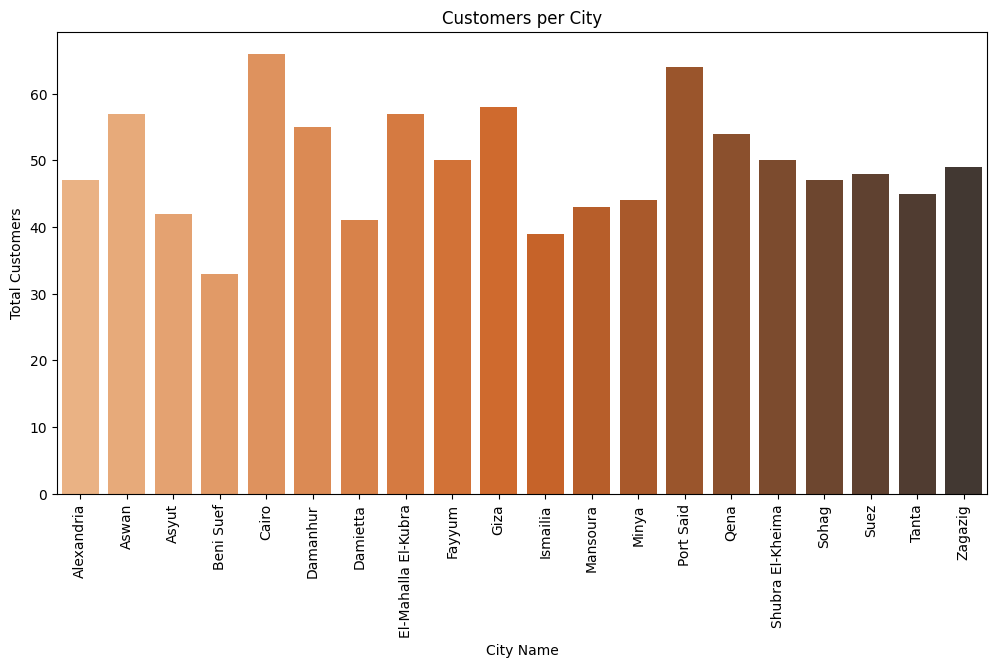

In [88]:
plt.figure(figsize=(12, 6))
sns.barplot(x='city_name', y='total_customers', data=city_analysis, palette="Oranges_d")
plt.title('Customers per City')
plt.xticks(rotation=90)
plt.xlabel('City Name')
plt.ylabel('Total Customers')
plt.show()

<ipython-input-89-84e0564f6ca3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender_name', y='total_transactions', data=gender_analysis, palette="coolwarm")


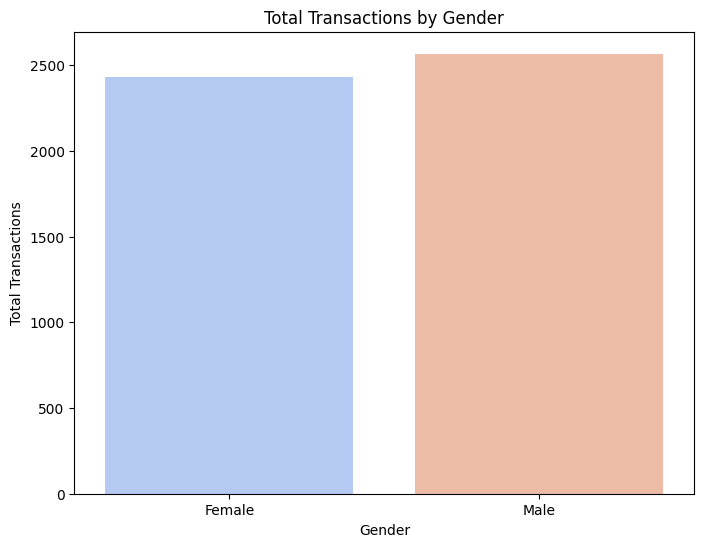

In [89]:
plt.figure(figsize=(8, 6))
sns.barplot(x='gender_name', y='total_transactions', data=gender_analysis, palette="coolwarm")
plt.title('Total Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Transactions')
plt.show()

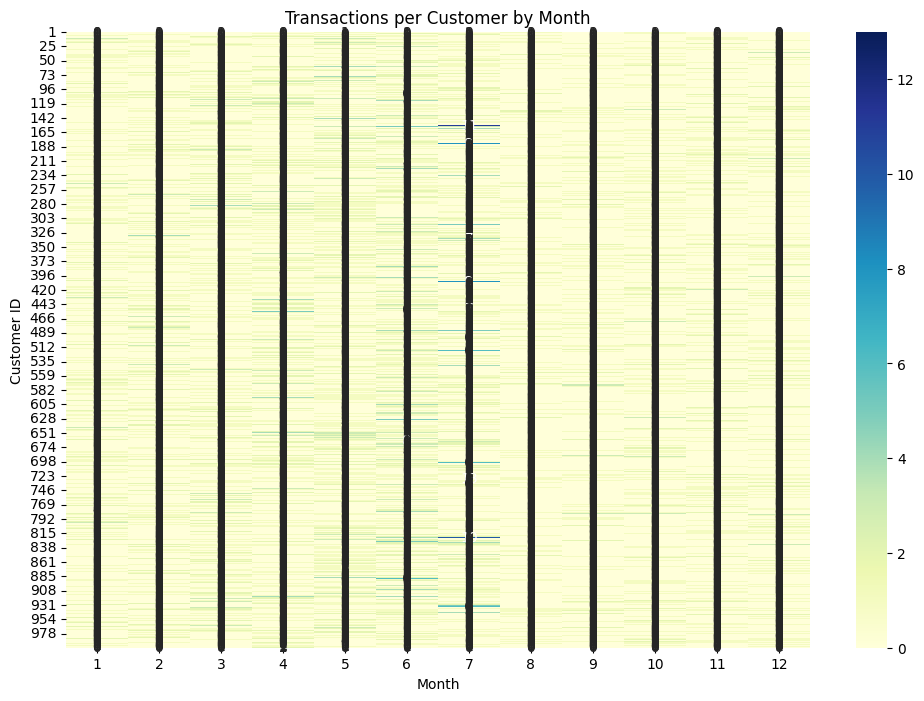

In [90]:
customer_month_transactions = transactions_full.groupby([transactions_full['customer_id'], transactions_full['transaction_date'].dt.month])['transaction_id'].count().unstack(fill_value=0)


plt.figure(figsize=(12, 8))
sns.heatmap(customer_month_transactions, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Transactions per Customer by Month')
plt.xlabel('Month')
plt.ylabel('Customer ID')
plt.show()

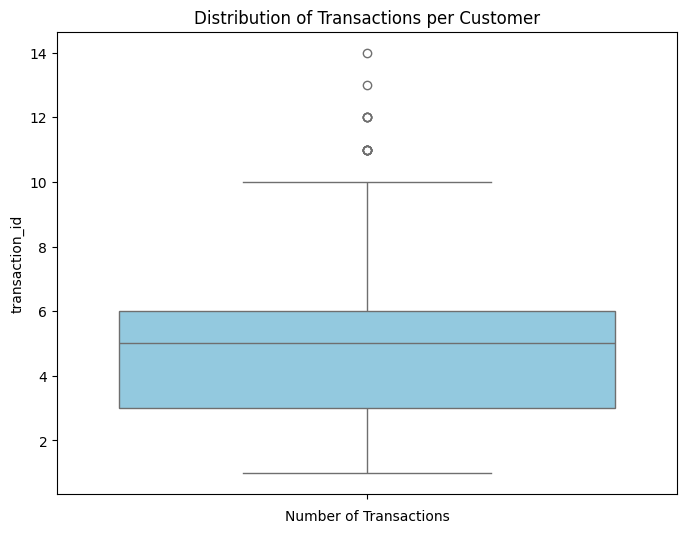

In [93]:
customer_transaction_count = transactions_full.groupby('customer_id')['transaction_id'].count()


plt.figure(figsize=(8, 6))
sns.boxplot(customer_transaction_count, color='skyblue')
plt.title('Distribution of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.show()

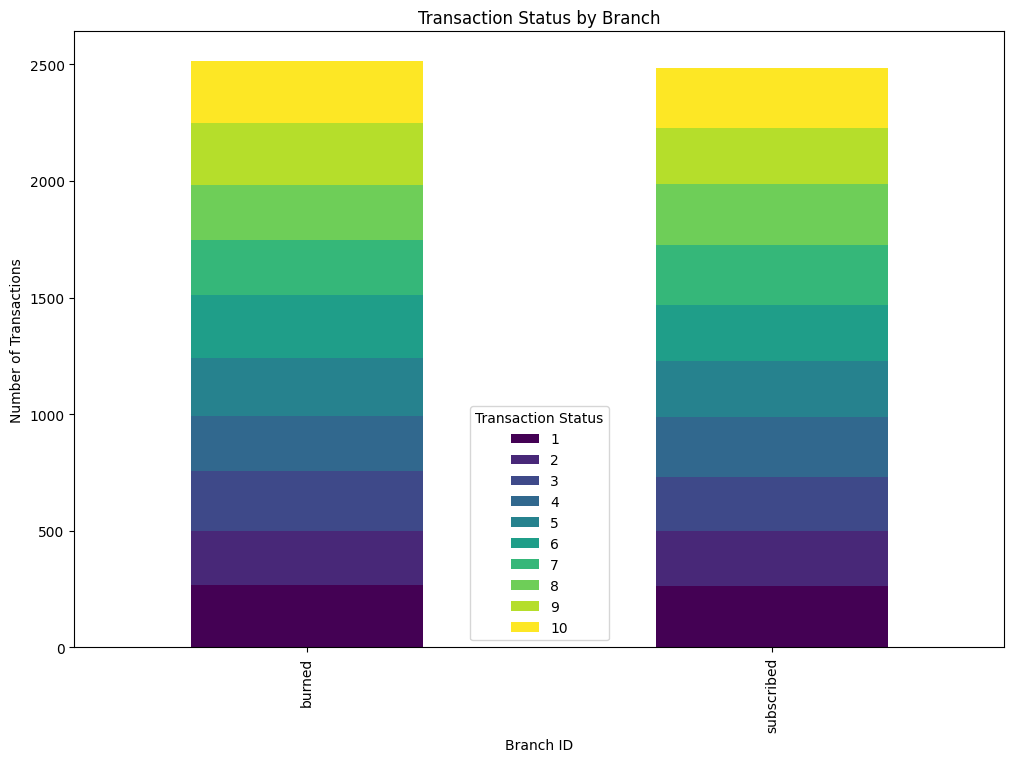

In [94]:
status_transactions = transactions_full.groupby(['transaction_status', 'branch_id']).size().unstack(fill_value=0)


status_transactions.plot(kind='bar', stacked=True, figsize=(12, 8), colormap="viridis")
plt.title('Transaction Status by Branch')
plt.xlabel('Branch ID')
plt.ylabel('Number of Transactions')
plt.legend(title='Transaction Status')
plt.show()

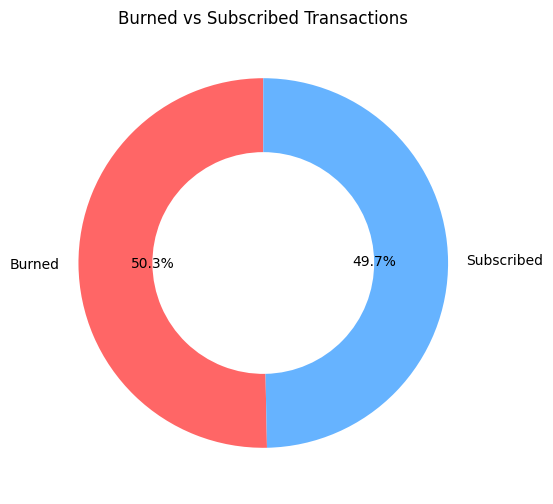

In [95]:
burned_count = transactions_full[transactions_full['transaction_status'] == 'burned'].shape[0]
total_transactions = transactions_full.shape[0]
subscribed_count = total_transactions - burned_count


sizes = [burned_count, subscribed_count]
labels = ['Burned', 'Subscribed']
colors = ['#ff6666', '#66b3ff']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title('Burned vs Subscribed Transactions')
plt.show()

<ipython-input-96-43733d81d579>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_id', y='city_name', data=city_customer_count, palette="coolwarm")


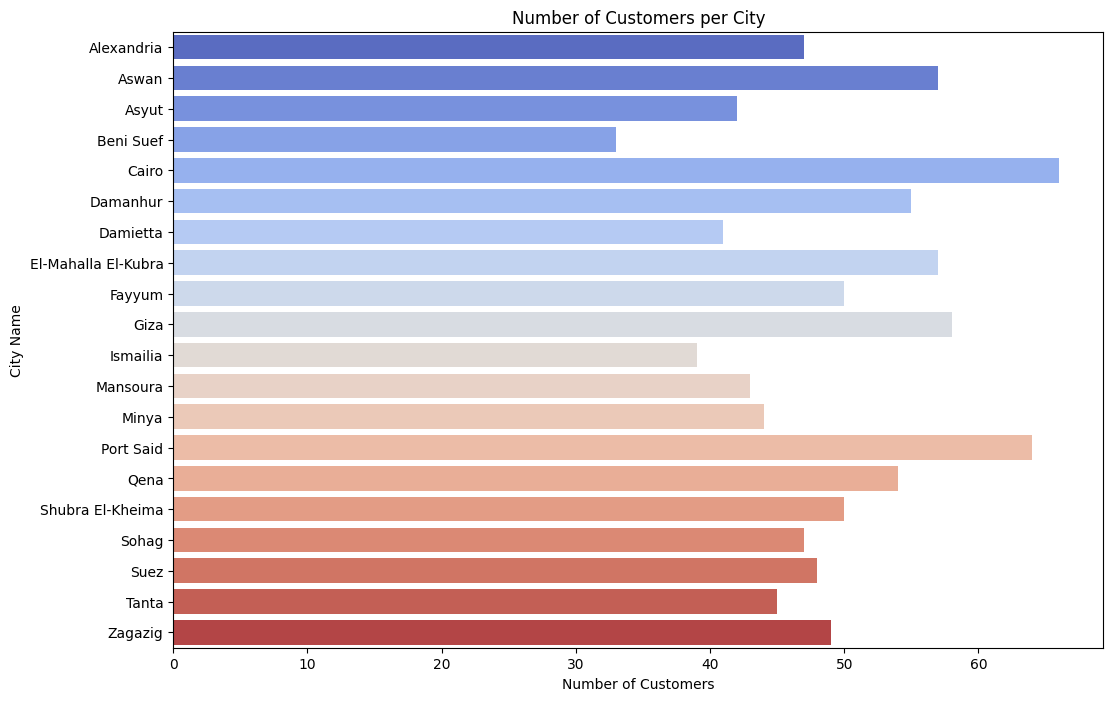

In [96]:
city_customer_count = customer_aggregated.groupby('city_name')['customer_id'].count().reset_index()


plt.figure(figsize=(12, 8))
sns.barplot(x='customer_id', y='city_name', data=city_customer_count, palette="coolwarm")
plt.title('Number of Customers per City')
plt.xlabel('Number of Customers')
plt.ylabel('City Name')
plt.show()

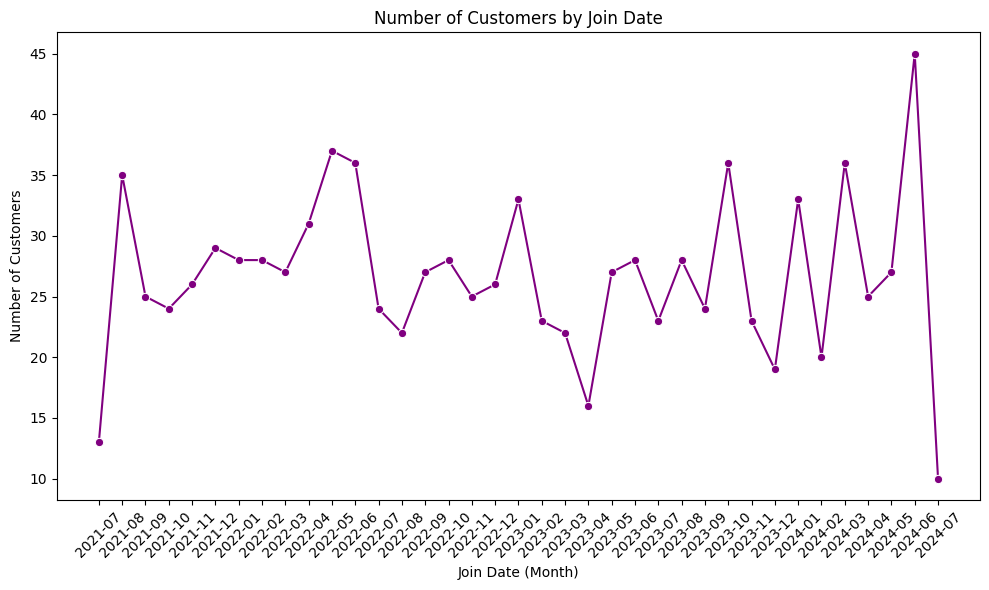

In [98]:
customer_aggregated['join_date'] = pd.to_datetime(customer_aggregated['join_date'], errors='coerce')


customer_join_date = customer_aggregated.groupby(customer_aggregated['join_date'].dt.to_period('M'))['customer_id'].count().reset_index()


customer_join_date['join_date'] = customer_join_date['join_date'].astype(str)


plt.figure(figsize=(10, 6))
sns.lineplot(x='join_date', y='customer_id', data=customer_join_date, marker="o", color='purple')
plt.title('Number of Customers by Join Date')
plt.xlabel('Join Date (Month)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

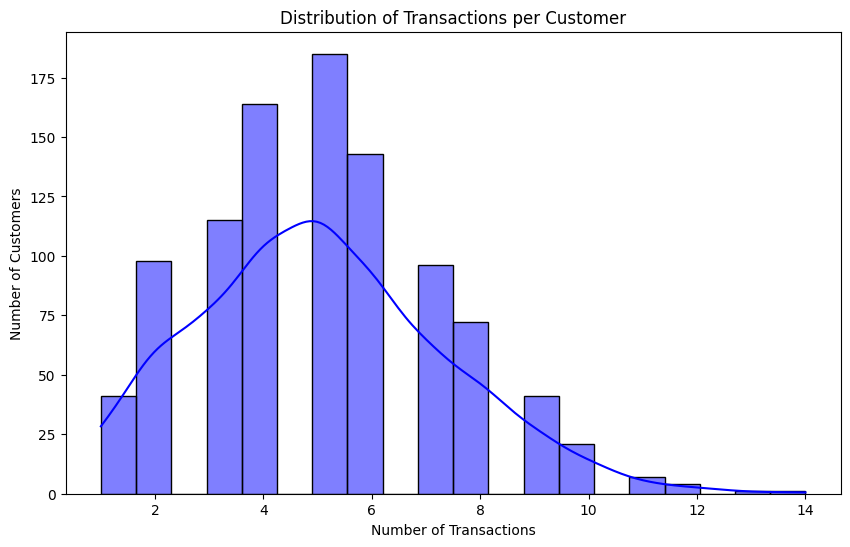

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_aggregated['transaction_count'], bins=20, kde=True, color='blue')
plt.title('Distribution of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()

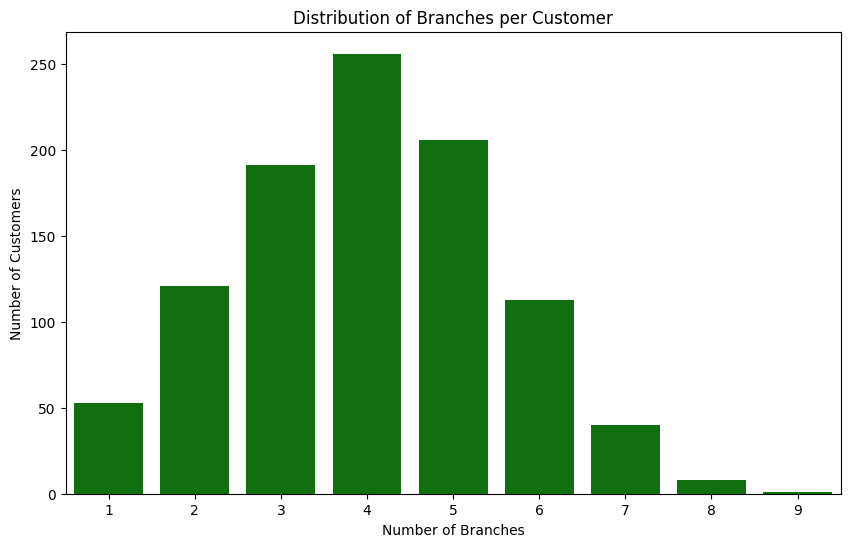

In [101]:
branch_distribution = customer_aggregated['branch_count'].value_counts().reset_index()
branch_distribution.columns = ['branch_count', 'customer_count']


plt.figure(figsize=(10, 6))
sns.barplot(x='branch_count', y='customer_count', data=branch_distribution, color='green')
plt.title('Distribution of Branches per Customer')
plt.xlabel('Number of Branches')
plt.ylabel('Number of Customers')
plt.show()

<ipython-input-102-13b74ddf41c2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dbscan_cluster', data=customer_aggregated, palette='coolwarm')


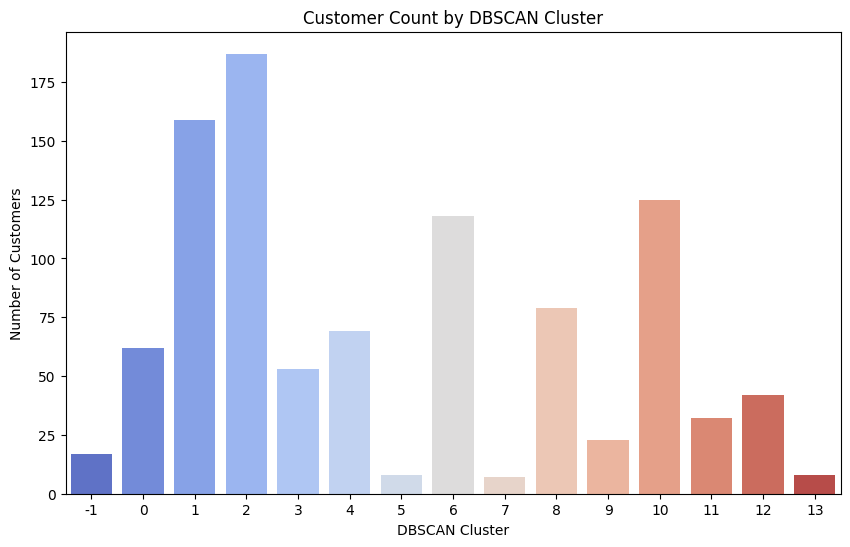

In [102]:
plt.figure(figsize=(10, 6))
sns.countplot(x='dbscan_cluster', data=customer_aggregated, palette='coolwarm')
plt.title('Customer Count by DBSCAN Cluster')
plt.xlabel('DBSCAN Cluster')
plt.ylabel('Number of Customers')
plt.show()

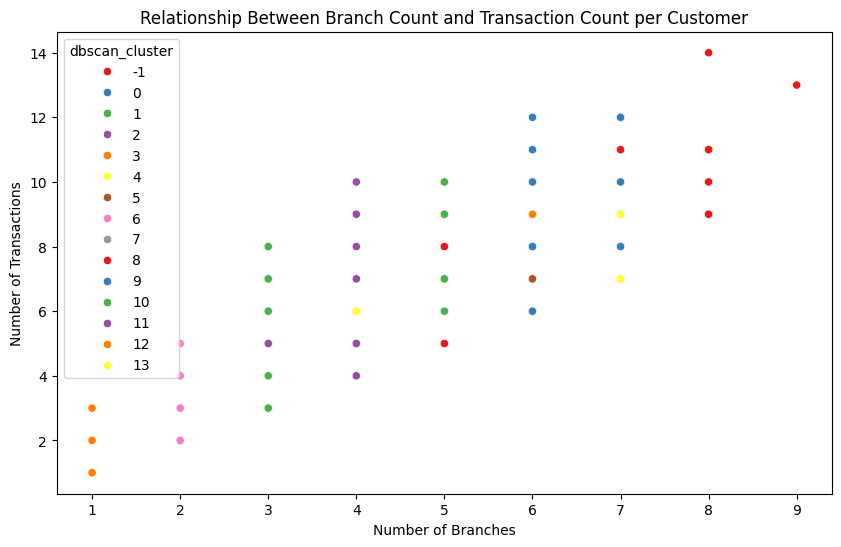

In [103]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='branch_count', y='transaction_count', data=customer_aggregated, hue='dbscan_cluster', palette='Set1')
plt.title('Relationship Between Branch Count and Transaction Count per Customer')
plt.xlabel('Number of Branches')
plt.ylabel('Number of Transactions')
plt.show()

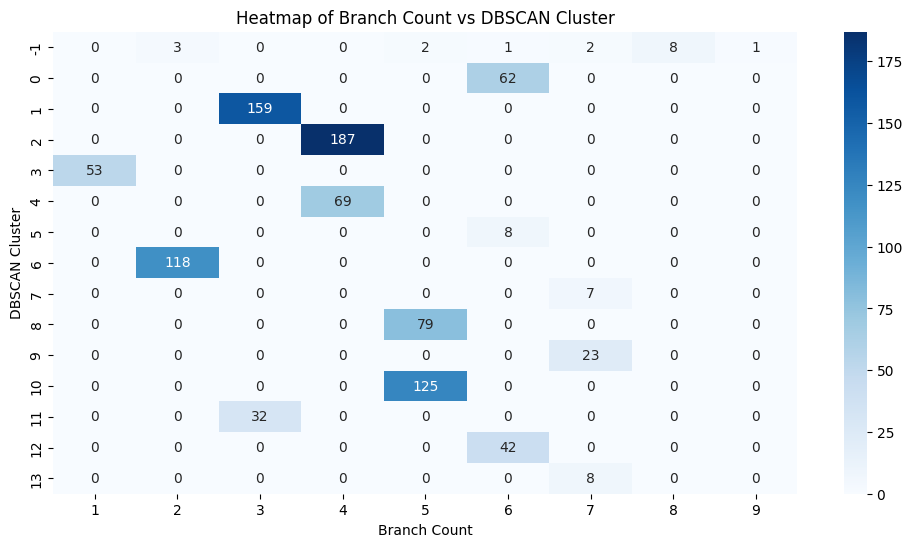

In [104]:
heatmap_data = customer_aggregated.pivot_table(index='dbscan_cluster', columns='branch_count', values='customer_id', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d')
plt.title('Heatmap of Branch Count vs DBSCAN Cluster')
plt.xlabel('Branch Count')
plt.ylabel('DBSCAN Cluster')
plt.show()

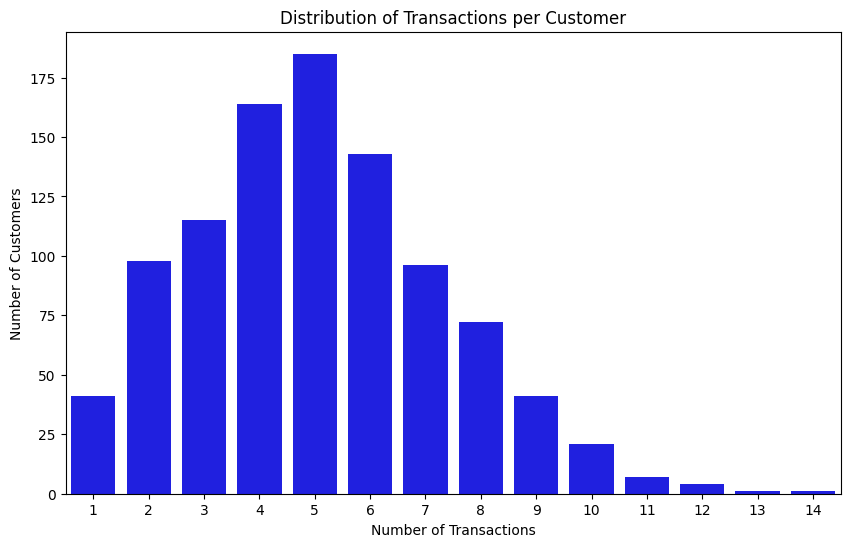

In [105]:
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_aggregated['transaction_count'].value_counts().index,
            y=customer_aggregated['transaction_count'].value_counts().values, color='blue')
plt.title('Distribution of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()

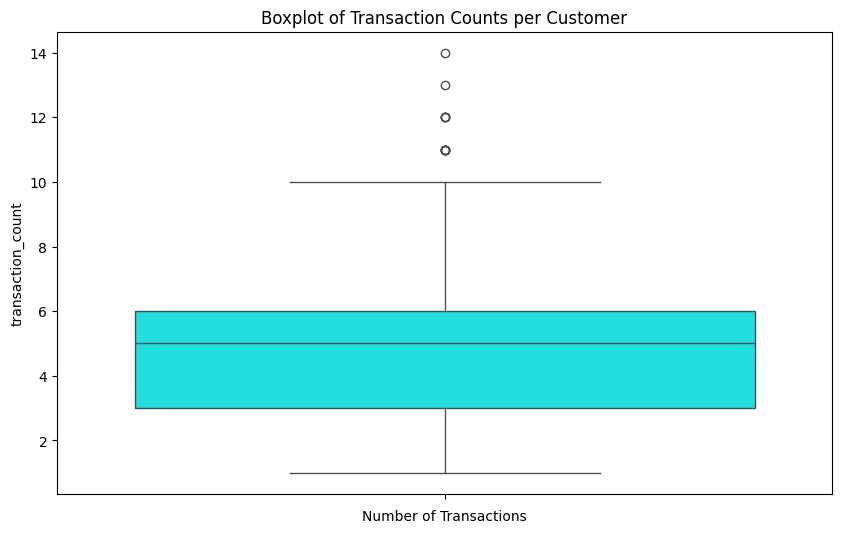

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot(customer_aggregated['transaction_count'], color='cyan')
plt.title('Boxplot of Transaction Counts per Customer')
plt.xlabel('Number of Transactions')
plt.show()

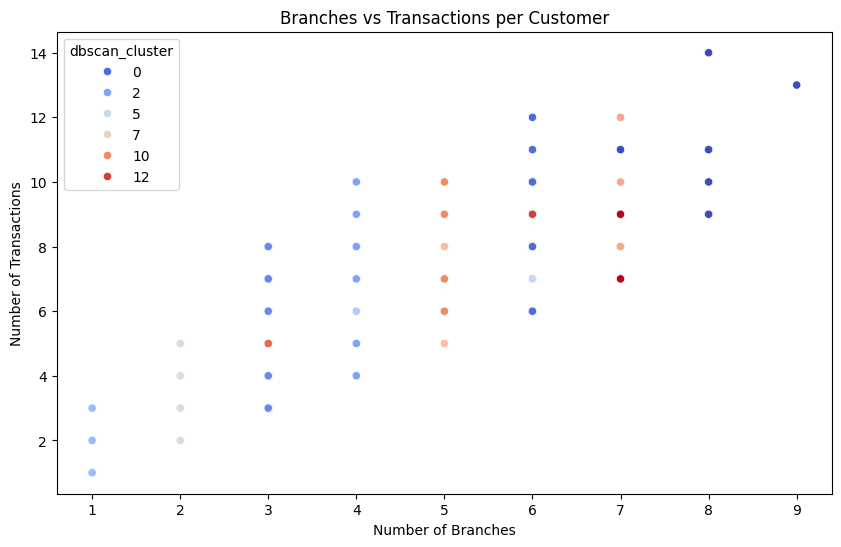

In [107]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='branch_count', y='transaction_count', data=customer_aggregated, hue='dbscan_cluster', palette='coolwarm')
plt.title('Branches vs Transactions per Customer')
plt.xlabel('Number of Branches')
plt.ylabel('Number of Transactions')
plt.show()

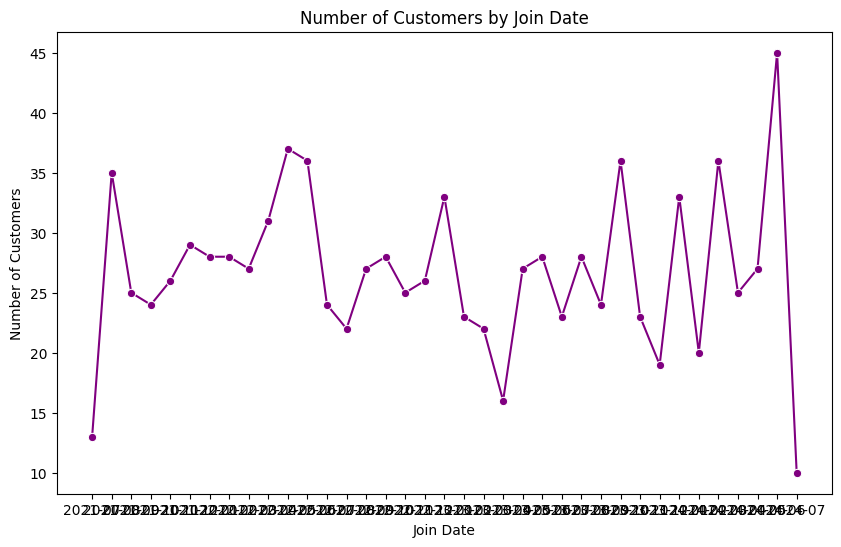

In [108]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=customer_join_date['join_date'], y=customer_join_date['customer_id'], marker="o", color='purple')
plt.title('Number of Customers by Join Date')
plt.xlabel('Join Date')
plt.ylabel('Number of Customers')
plt.show()

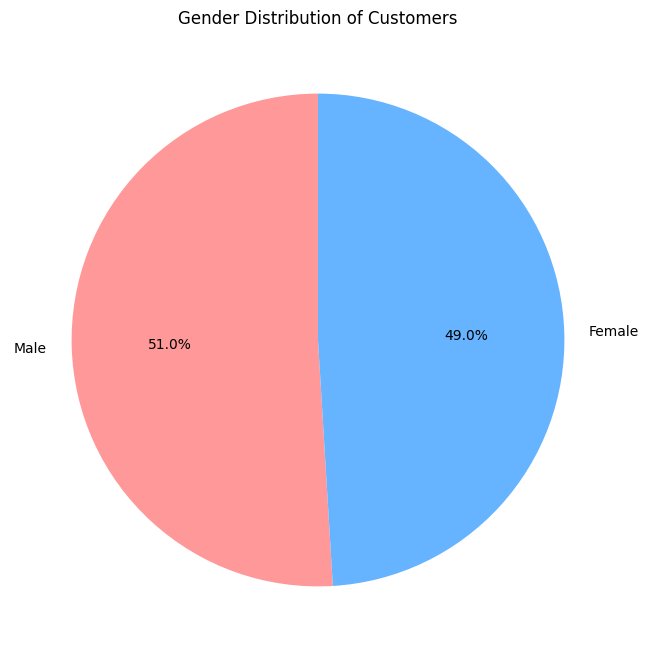

In [109]:
plt.figure(figsize=(8, 8))
gender_distribution = customer_aggregated['gender_name'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution of Customers')
plt.show()

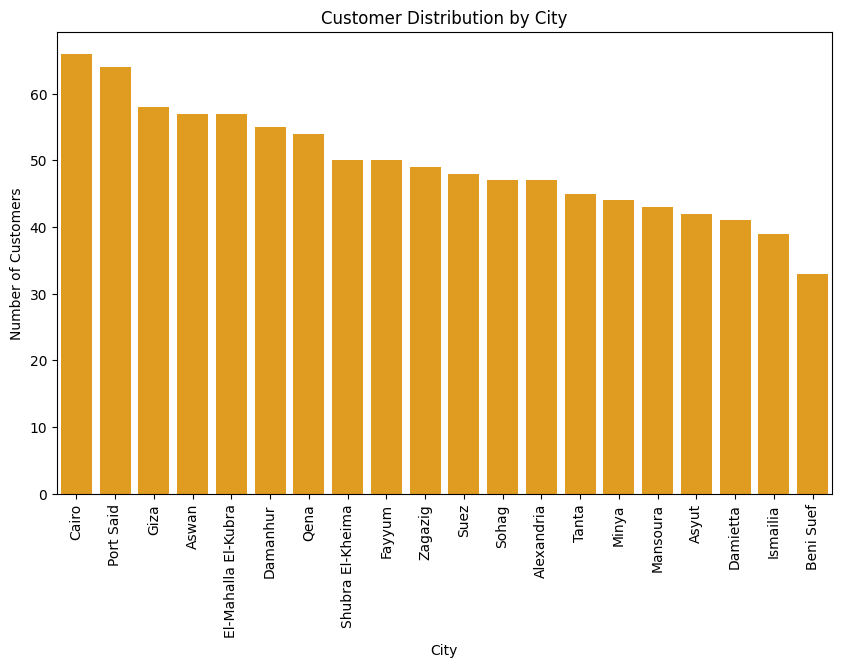

In [110]:
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_aggregated['city_name'].value_counts().index,
            y=customer_aggregated['city_name'].value_counts().values, color='orange')
plt.title('Customer Distribution by City')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.show()

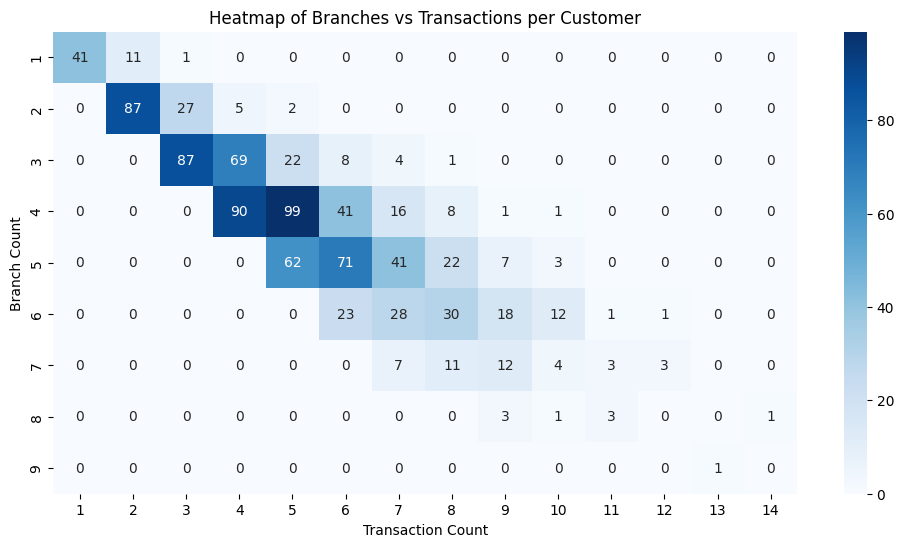

In [111]:
plt.figure(figsize=(12, 6))
heatmap_data = customer_aggregated.pivot_table(index='branch_count', columns='transaction_count', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='Blues', annot=True)
plt.title('Heatmap of Branches vs Transactions per Customer')
plt.xlabel('Transaction Count')
plt.ylabel('Branch Count')
plt.show()

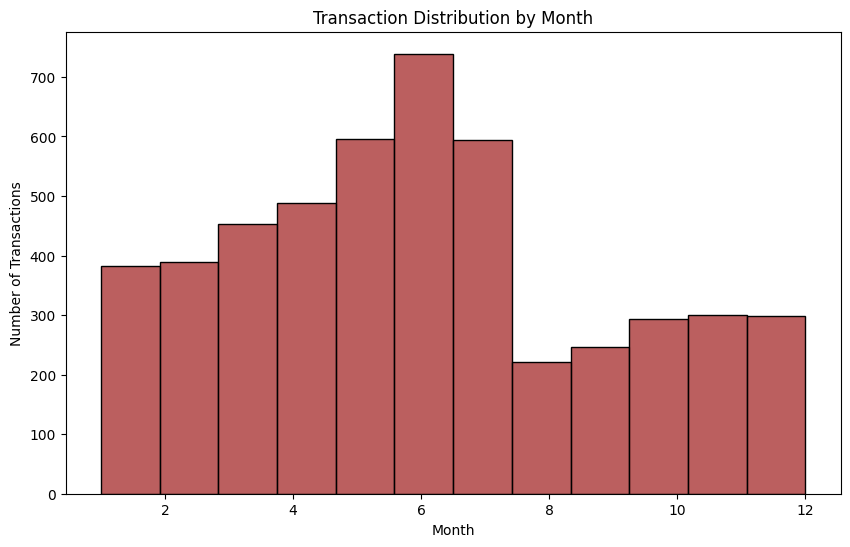

In [112]:
plt.figure(figsize=(10, 6))
sns.histplot(transactions_full['transaction_date'].dt.month, bins=12, color='brown')
plt.title('Transaction Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

<ipython-input-113-df5dafff5562>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dbscan_cluster', data=customer_aggregated, palette='Set3')


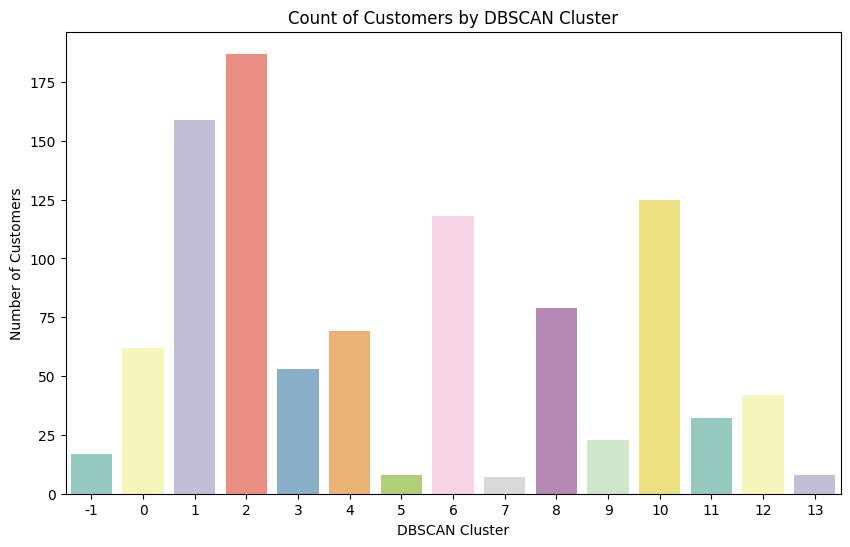

In [113]:
plt.figure(figsize=(10, 6))
sns.countplot(x='dbscan_cluster', data=customer_aggregated, palette='Set3')
plt.title('Count of Customers by DBSCAN Cluster')
plt.xlabel('DBSCAN Cluster')
plt.ylabel('Number of Customers')
plt.show()

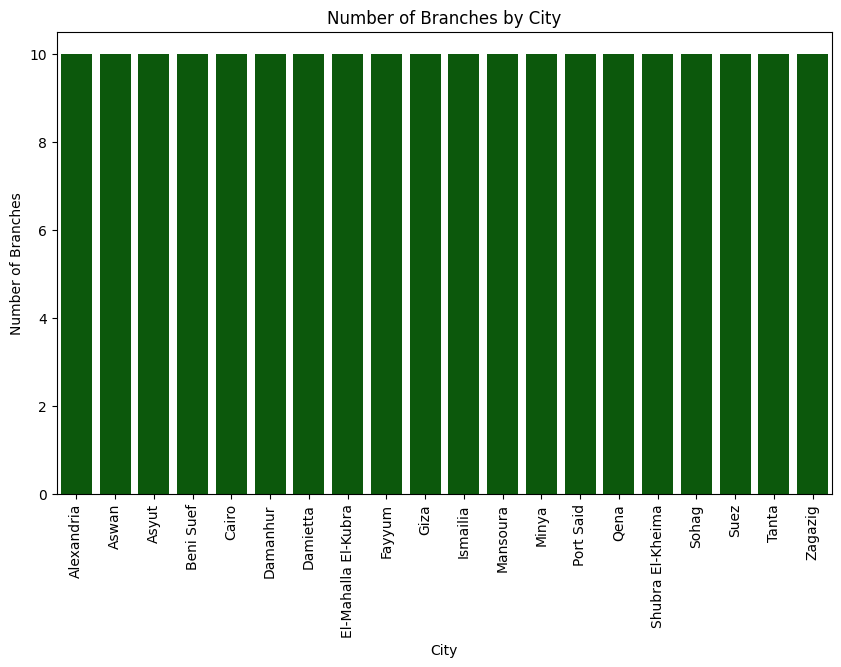

In [114]:
branch_city_distribution = transactions_full.groupby('city_name')['branch_id'].nunique().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='city_name', y='branch_id', data=branch_city_distribution, color='darkgreen')
plt.title('Number of Branches by City')
plt.xlabel('City')
plt.ylabel('Number of Branches')
plt.xticks(rotation=90)
plt.show()

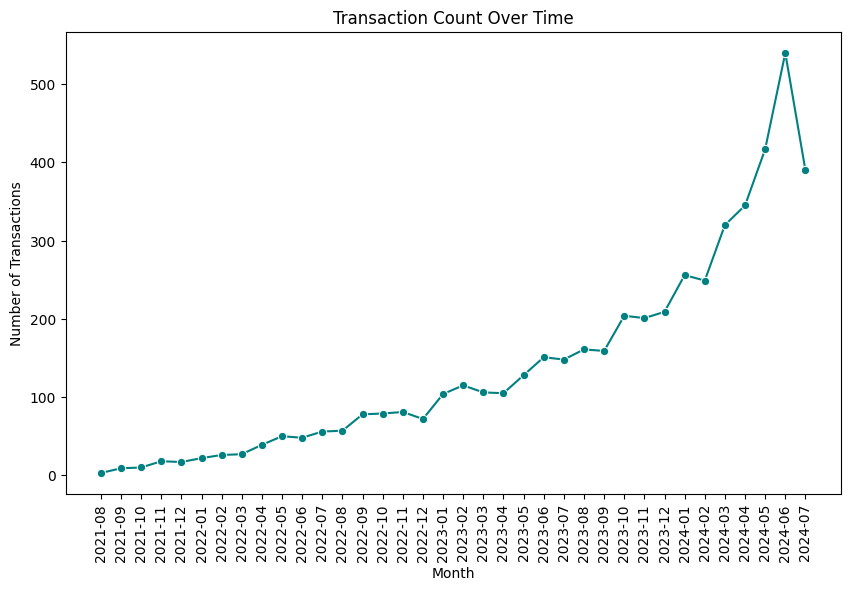

In [115]:
plt.figure(figsize=(10, 6))
transactions_per_month = transactions_full.groupby(transactions_full['transaction_date'].dt.to_period('M')).size()
sns.lineplot(x=transactions_per_month.index.astype(str), y=transactions_per_month.values, marker="o", color='teal')
plt.title('Transaction Count Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()

<ipython-input-117-65c29f63d0bb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='transaction_status', data=transactions_full, palette='pastel')


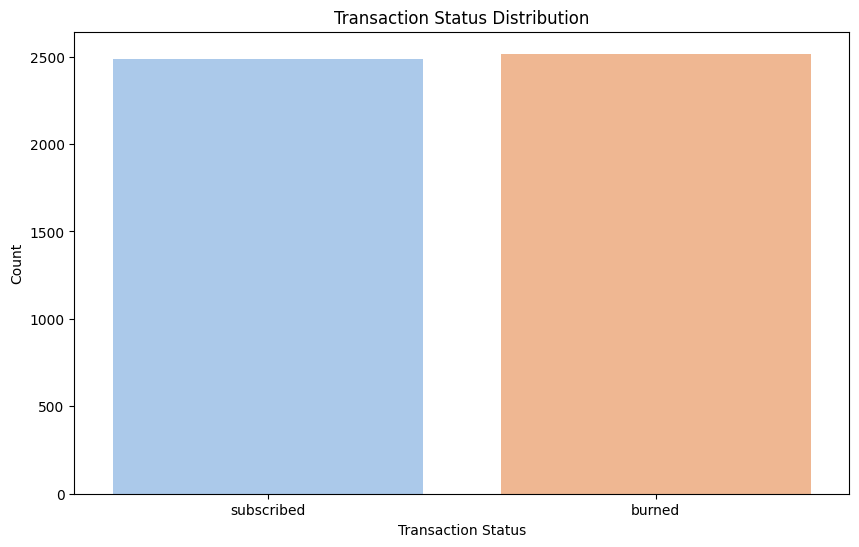

In [117]:
plt.figure(figsize=(10, 6))
sns.countplot(x='transaction_status', data=transactions_full, palette='pastel')
plt.title('Transaction Status Distribution')
plt.xlabel('Transaction Status')
plt.ylabel('Count')
plt.show()

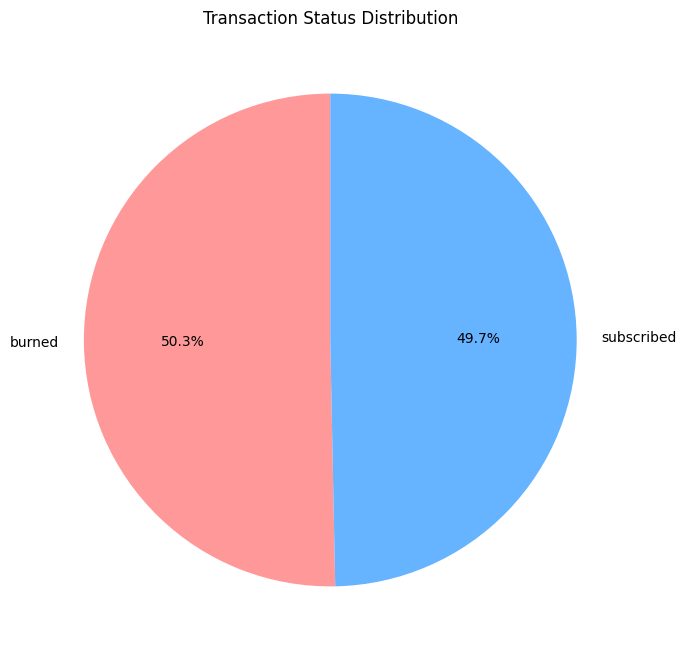

In [118]:
transaction_status_distribution = transactions_full['transaction_status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(transaction_status_distribution, labels=transaction_status_distribution.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Transaction Status Distribution')
plt.show()

<ipython-input-122-874768cdd331>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender_name', y='transaction_value', data=transactions_full, palette='muted')


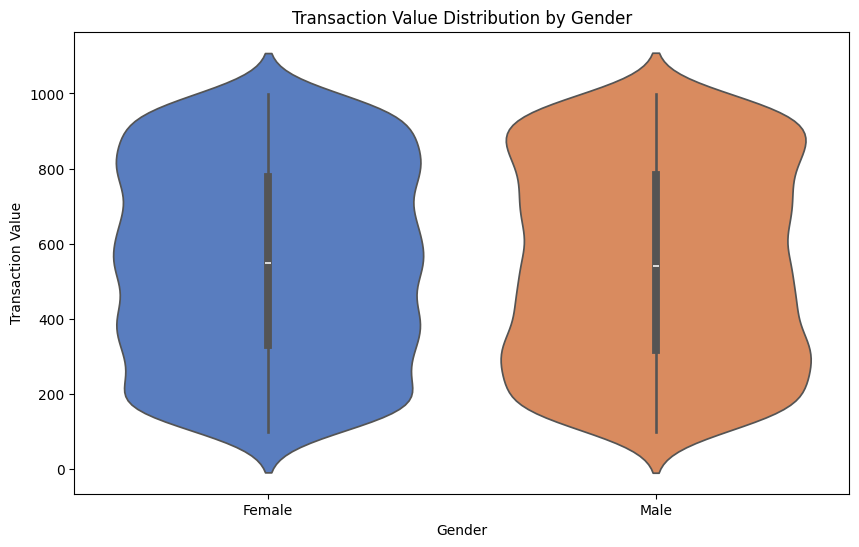

In [122]:
import numpy as np

transactions_full['transaction_value'] = np.random.randint(100, 1000, size=len(transactions_full))


plt.figure(figsize=(10, 6))
sns.violinplot(x='gender_name', y='transaction_value', data=transactions_full, palette='muted')
plt.title('Transaction Value Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Transaction Value')
plt.show()

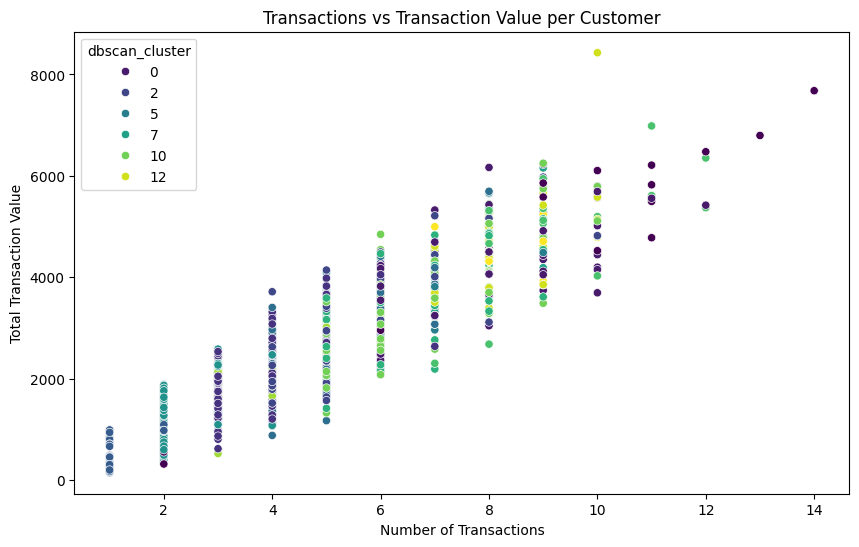

In [123]:
customer_transaction_values = transactions_full.groupby('customer_id').agg(
    total_transaction_value=('transaction_value', 'sum')
).reset_index()


customer_aggregated = customer_aggregated.merge(customer_transaction_values, on='customer_id', how='left')

# رسم Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='transaction_count', y='total_transaction_value', data=customer_aggregated, hue='dbscan_cluster', palette='viridis')
plt.title('Transactions vs Transaction Value per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Total Transaction Value')
plt.show()

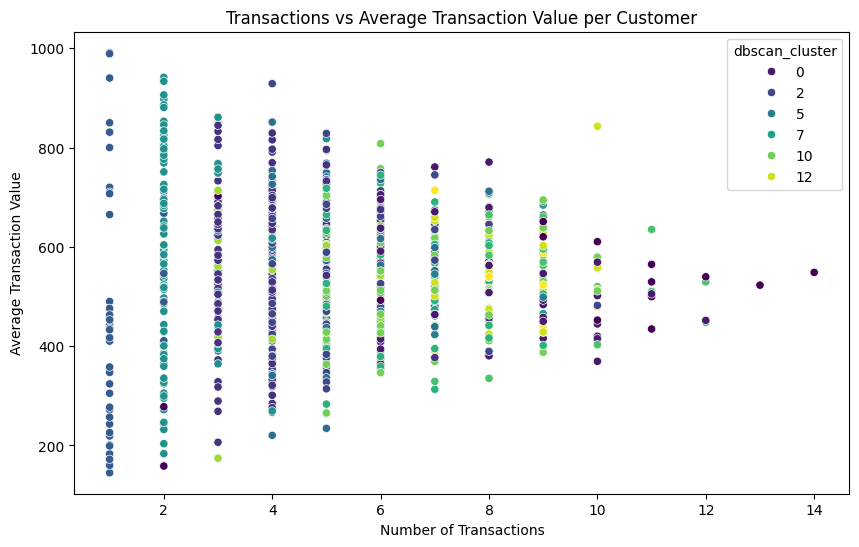

In [124]:
customer_transaction_values = transactions_full.groupby('customer_id').agg(
    avg_transaction_value=('transaction_value', 'mean')
).reset_index()


customer_aggregated = customer_aggregated.merge(customer_transaction_values, on='customer_id', how='left')


plt.figure(figsize=(10, 6))
sns.scatterplot(x='transaction_count', y='avg_transaction_value', data=customer_aggregated, hue='dbscan_cluster', palette='viridis')
plt.title('Transactions vs Average Transaction Value per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Average Transaction Value')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

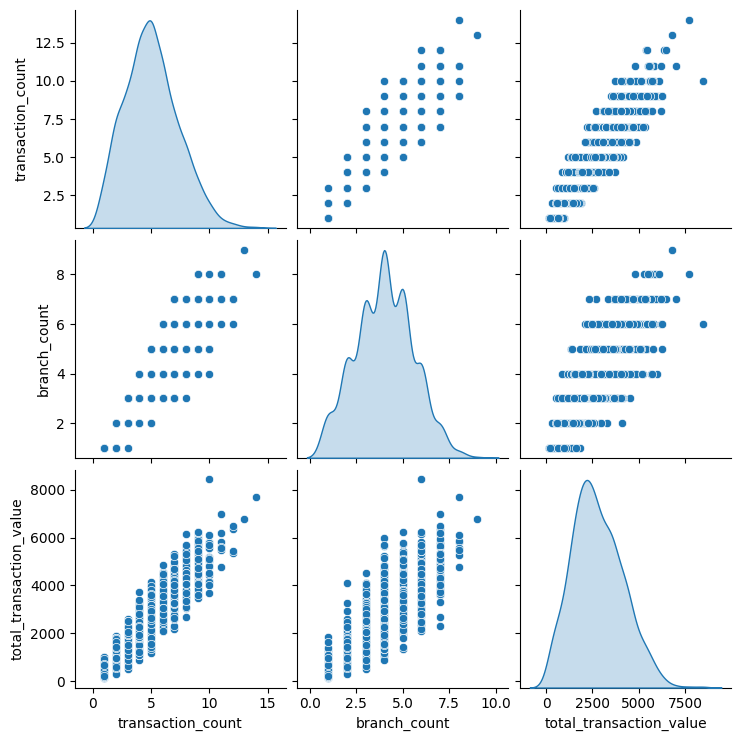

In [127]:
sns.pairplot(customer_aggregated[['transaction_count', 'branch_count', 'total_transaction_value']], diag_kind='kde', palette='husl')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

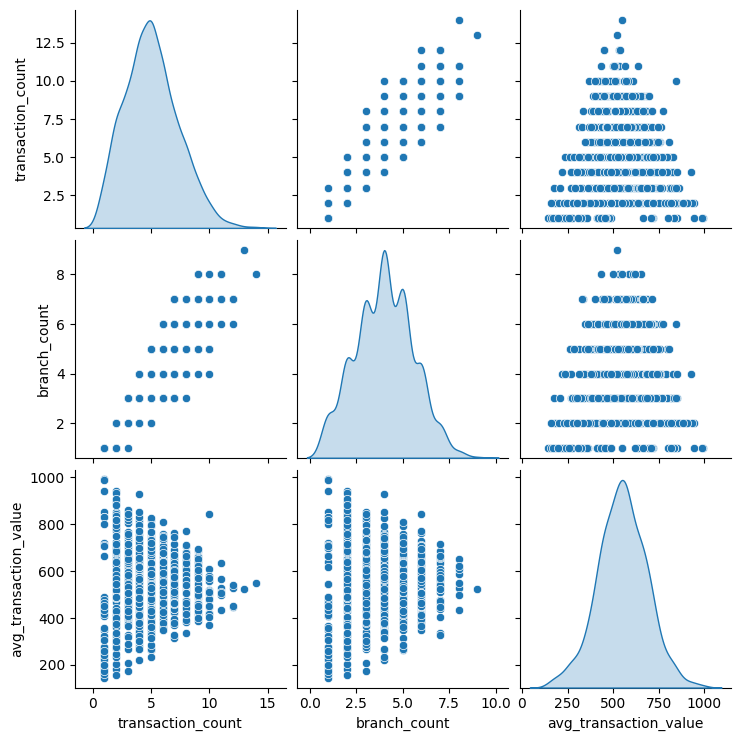

In [128]:
sns.pairplot(customer_aggregated[['transaction_count', 'branch_count', 'avg_transaction_value']], diag_kind='kde', palette='husl')
plt.show()

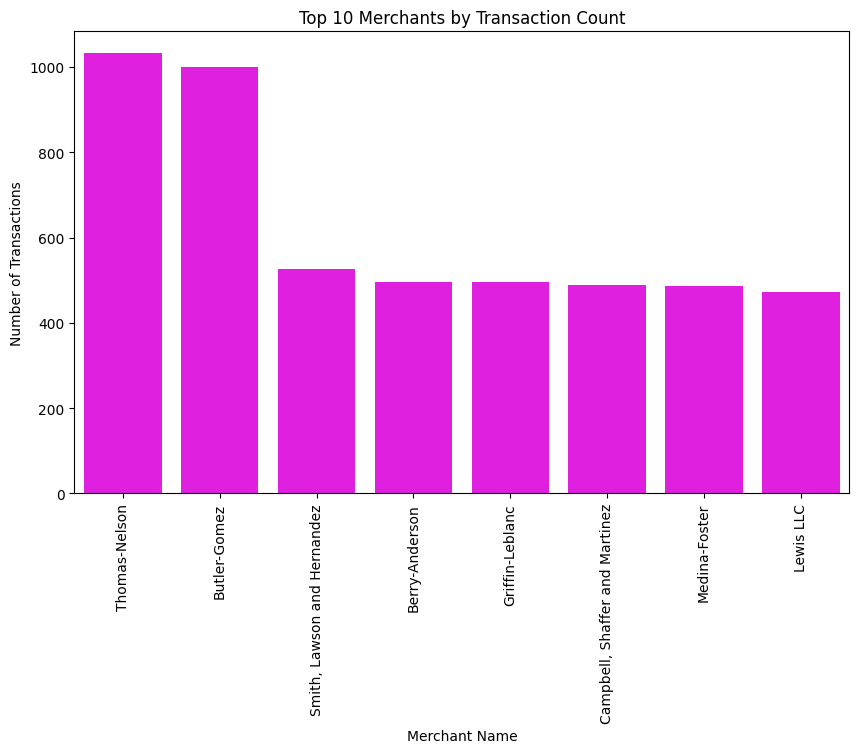

In [136]:
top_merchants = transactions_full['merchant_name'].value_counts().nlargest(10).reset_index()
top_merchants.columns = ['merchant_name', 'count']


plt.figure(figsize=(10, 6))
sns.barplot(x='merchant_name', y='count', data=top_merchants, color='magenta')
plt.title('Top 10 Merchants by Transaction Count')
plt.xlabel('Merchant Name')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()

<ipython-input-137-2b73cbe1b7af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='city_name', data=transactions_full, order=transactions_full['city_name'].value_counts().index, palette='RdYlBu')


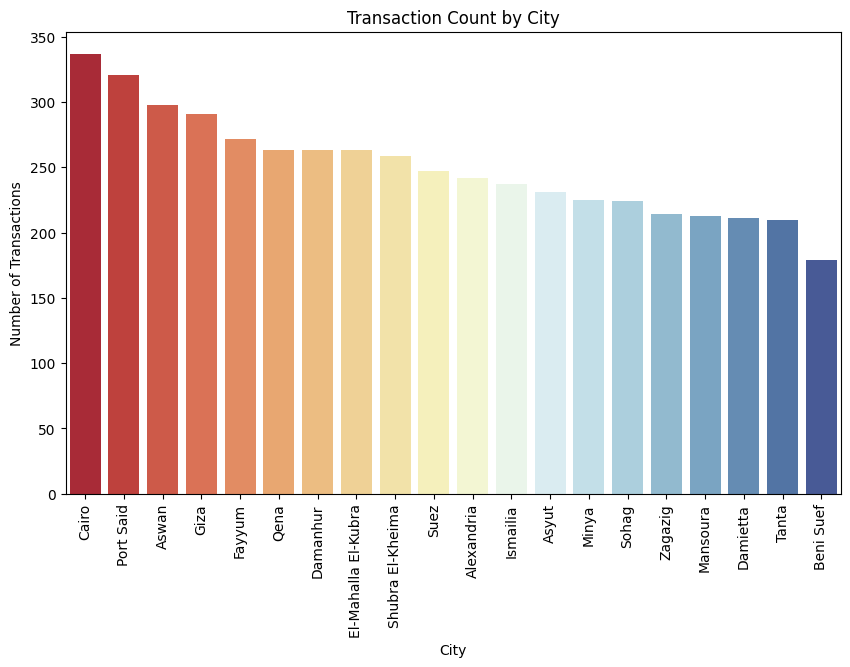

In [137]:
plt.figure(figsize=(10, 6))
sns.countplot(x='city_name', data=transactions_full, order=transactions_full['city_name'].value_counts().index, palette='RdYlBu')
plt.title('Transaction Count by City')
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()

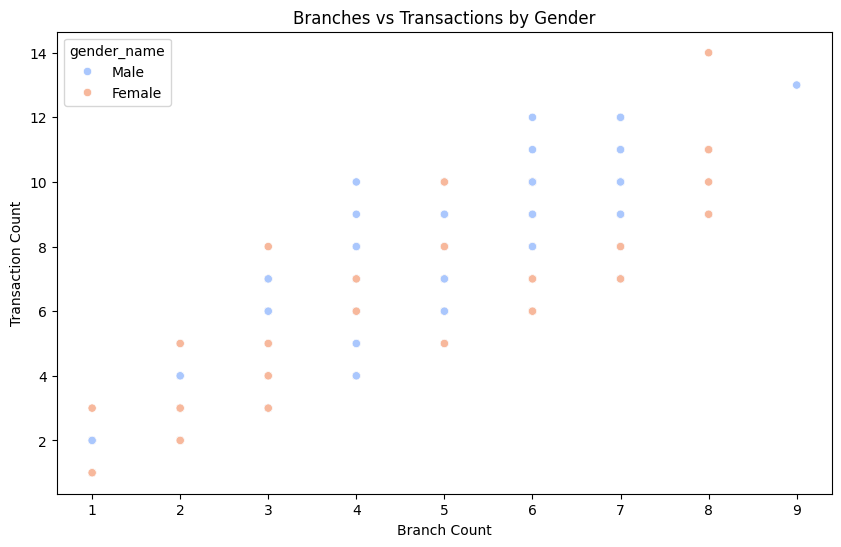

In [138]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='branch_count', y='transaction_count', hue='gender_name', data=customer_aggregated, palette='coolwarm')
plt.title('Branches vs Transactions by Gender')
plt.xlabel('Branch Count')
plt.ylabel('Transaction Count')
plt.show()

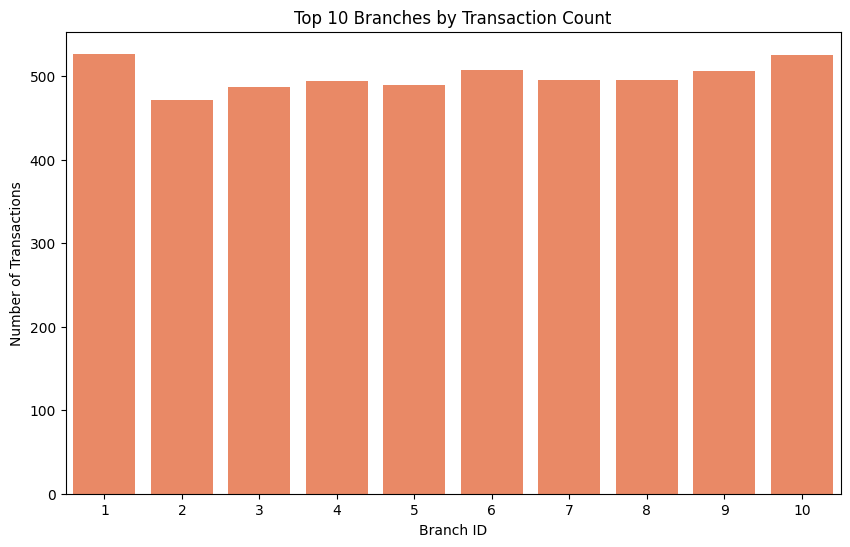

In [140]:
top_branches = transactions_full['branch_id'].value_counts().nlargest(10).reset_index()
top_branches.columns = ['branch_id', 'transaction_count']


plt.figure(figsize=(10, 6))
sns.barplot(x='branch_id', y='transaction_count', data=top_branches, color='coral')
plt.title('Top 10 Branches by Transaction Count')
plt.xlabel('Branch ID')
plt.ylabel('Number of Transactions')
plt.show()